# Introduction

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that [Fandango's](https://www.fandango.com/) rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in this [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) — a great piece of data journalism that's totally worth reading. In Hickey's investigation,the date he collected a of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.



In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.


 We test the hypotheses of Hickey on the Fandango rating system which are

    1. Improperness in rounding off the actual rating
    2. Rounding off done to the nearest whole star
    3. Bizarre rounding off of rating of a movie

## Understanding the Data

One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis. 

We have ready-made data for both these periods of time:

- Date prior to Walt Hickey's analysis is publicly available [on GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango).

- The data is publicly available [on GitHub](https://github.com/mircealex/Movie_ratings_2016_17) for movies released in 2016 and 2017 and we'll use it to analyze the rating system's characteristics after Hickey's analysis.



In [17]:
import pandas as pd
pd.options.display.max_columns = 100  # Avoid having displayed truncated output

previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

previous.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [18]:
after.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


Let's isolate the columns that offer more infromation about fandango related columns from both datasets so we make the relevant data more readily available for later use. We'll make copies to avoid any SettingWithCopyWarning later on.

In [19]:
fandango_previous=previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after=after[['movie', 'year', 'fandango']].copy()

In [20]:
fandango_previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [21]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for our analysis is made of all the movie ratings stored on Fandango's website, regardless of the releasing year.

Since, we want to find out whether there are are any changes in parameters of the population after Hickey's analysis.So, we're interested in sampling the population at two different periods in time — previous and after Hickey's analysis.
 
The data we're working with was sampled at the moments we want: one sample was taken previous to the analysis, and the other after the analysis. We want to describe the population, so we need to make sure that the samples are representative, otherwise we should expect a large sampling error and, ultimately, wrong conclusions.

### Finding of the sampling conditions of Hickey's analysis 

From Hickey's article and from the [README.md](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md/) of the data set's repository, we can see that he used the following sampling criteria:

- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
- The movie must have had tickets on sale in 2015.


The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015).

It's questionable whether this sample is representative of the entire population we're interested to describe. It seems more likely that it isn't, mostly because this sample is subject to temporal trends — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

### Finding of the sampling conditions of other dataset

As mentioned in the [README.md](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md) of the data set's repository:

- The movie must have been released in 2016 or later.
- The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).

This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called purposive sampling (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for us.

## Changes to our data analysis goal

Setbacks like these are common in practical data analysis — we spend time to collect data only to find out that we haven't found exactly what you need. At this point, we have at least two alternatives: either we collect new data, either we change the goal of our analysis by placing some limitations on it.

Tweaking our goal seems a much faster choice compared to collecting new data. Also, it's quasi-impossible to collect a new sample previous to Hickey's analysis at this moment in time.

**GOAL:** Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal. 



## Isolating the sample points that belong to our populations
If you explore the data sets enough, you'll notice that some movies were not released in 2015 and 2016. 

With the new goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

We should be clear what defines as "popular" for our population. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

Although one of the sampling criteria in our second sample is movie popularity, the sample doesn't provide information about the number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contains popular movies (movies with over 30 fan ratings).

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.


**Below, we will use a value of 21 as the random seed. This is good practice because it suggests that we weren't trying out various random seeds just to get a favorable sample**

In [22]:
fandango_after.sample(10, random_state = 21)

,movie,year,fandango
52,Fences,2016,4.0
17,Barbershop: The Next Cut,2016,4.5
40,Deadpool,2016,4.5
6,A Street Cat Named Bob,2016,4.5
9,Amateur Night,2016,3.5
213,Zootopia,2016,4.5
105,Masterminds,2016,3.5
151,Suicide Squad,2016,4.0
99,London Has Fallen,2016,4.5
130,Patriots Day,2016,4.5


As of July 2021, these are the fan ratings we found:

|Movie|	Fan ratings|
|-----|------|
|Fences|25000+|
|Barbershop: The Next Cut|10000+|
|Deadpool|100000+|
|A Street Cat Named Bob|2500+|
|Amateur Night|250+|
|Zootopia|100000+|
|Masterminds|25000+|
|Suicide Squad	|100000+|
|London Has Fallen|25000+|
|Patriots Day|25000+|



Since we don't have ratings in one of our datasets, let's sample our data with enough popular movies and manually check the rating from fandango website for the movies in the sample. This would help us figure out what percentage of the population is representative of our population.

80% of the movies in our sample are popular as they have over 25K ratings. This is enough and we move forward with a bit more confidence. Let's also double-check the other data set for popular movies. The documentation states clearly that there're only movies with at least 30 fan ratings, but it should take only a couple of seconds to double-check here.


In [23]:
fandango_after["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

### Extracting and creating year column in fandango_previous dataset

If you explore the two data sets, you'll notice that there are movies with a releasing year different than 2015 or 2016. For our purposes, we'll need to isolate only the movies released in 2015 and 2016. Let's start with Hickey's data set and isolate only the movies released in 2015. There's no special column for the releasing year, but we should be able to extract it from the strings in the FILM column

In [24]:
fandango_previous["year"]=fandango_previous["FILM"].str[-5:-1]
print(fandango_previous["year"].value_counts())

2015    129
2014     17
Name: year, dtype: int64


In [25]:
fandango_2015=fandango_previous[fandango_previous["year"]== "2015"].copy()
fandango_2015.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [26]:

fandango_2016=fandango_after[fandango_after["year"]==2016].copy()  

fandango_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


## Visualizing and comparing distributions for 2015 and 2016 

Our aim is to figure out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. One way to go about is to analyze and compare the distributions of movie ratings for the two samples.

We'll start with comparing the shape of the two distributions using kernel density plots. We'll use the [FiveThirtyEight style](https://www.dataquest.io/blog/making-538-plots/) for the plots.

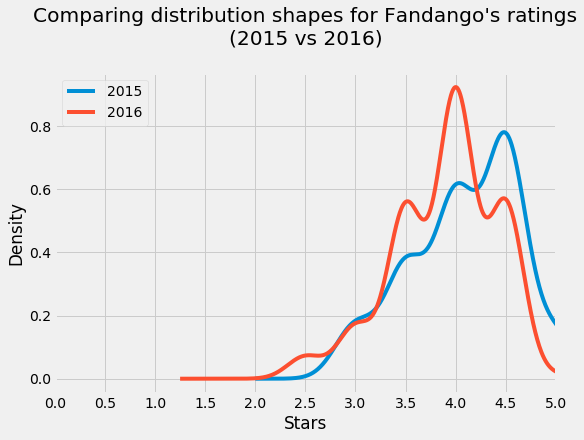

In [27]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()


Shape of both distributions is skewed slightly towards left.There is only slight difference in the graph.2016 ratings are slightly lower than 2015.The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

### Examining the frequencies


In [28]:
print("2015")

fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [29]:
print("2016")


fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

We that relative frequencies for rating 5 in 2016 is lower than that of 2015. 2015 had 7% of the ratings with rating 5.We can also observe that ratings are slightly lower for 2016 in each star compared to 2015.The minimum rating in 2016 is 2.5 while in 2015 is 3.

We see that for ratings 4 and 3.5,2016 has highest frequencies over 2015. So, it's difficult to indicate the direction of change for the distribution.

### Determining the direction change



In [30]:
mean_2015=fandango_2015["Fandango_Stars"].mean()
mean_2016=fandango_2016["fandango"].mean()

mode_2015=fandango_2015["Fandango_Stars"].mode()[0]
mode_2016=fandango_2016["fandango"].mode()[0]

median_2015=fandango_2015["Fandango_Stars"].median()
median_2016=fandango_2016["fandango"].median()




In [31]:
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


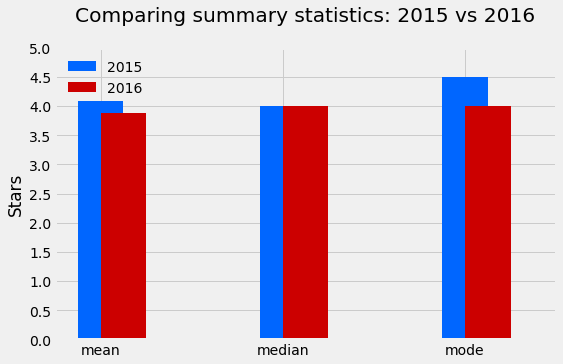

In [32]:
%matplotlib inline
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper left')
plt.show()


While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

## Conclusion
Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot confidently state what caused the change. But there are chances that Hickey's article might have caused Fandango to fix the biased rating system.